# What makes Time Series Special?

### As the name suggests, TS is a collection of data points collected at constant time intervals. These are analyzed to determine the long term trend so as to forecast the future or perform some other form of analysis. But what makes a TS different from say a regular regression problem? There are 2 things:

1. It is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.
2. Along with an increasing or decreasing trend, most TS have some form of seasonality trends, i.e. variations specific to a particular time frame. 

### Loading and Handling Time Series in Pandas
Pandas has dedicated libraries for handling TS objects, particularly the datatime64[ns] class 
which stores time information and allows us to perform some 
operations really fast. Lets start by firing up the required libraries:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [5]:
df = pd.read_csv('APPL_PrevOpenPrice.csv')
df.dtypes

date             object
close           float64
volume          float64
prevday_open    float64
high            float64
low             float64
open            float64
dtype: object

In [6]:
df

,date,close,volume,prevday_open,high,low,open
0,2018-04-18,177.8400,20544600.0,176.49000,178.8200,176.8800,113.11926
1,2018-04-17,178.2400,26575010.0,175.03010,178.9365,176.4100,177.81000
2,2018-04-16,175.8200,21561320.0,174.78000,176.1900,174.8301,176.49000
3,2018-04-13,174.7300,25100510.0,173.41000,175.8400,173.8500,175.03010
4,2018-04-12,174.1400,22858840.0,172.23000,175.0000,173.0400,174.78000
5,2018-04-11,172.4400,22401040.0,173.00000,173.9232,171.7000,173.41000
6,2018-04-10,173.2500,28567110.0,169.88000,174.0000,171.5300,172.23000
7,2018-04-09,170.0500,28976200.0,170.97000,173.0900,169.8450,173.00000
8,2018-04-06,168.3800,34949690.0,172.58000,172.4800,168.2000,169.88000
9,2018-04-05,172.8000,26750260.0,164.88000,174.2304,172.0800,170.97000


In [7]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.strftime('%m-%d')

### The data contains a particular month and open,low ,high,close prices of stock AAPL in that month. 
But this is still not read as a TS object as the data types are ‘object’ and ‘float’. In order to read the 
data as a time series, we have to pass special arguments to the read_csv command:

In [10]:
df = pd.read_csv('APPL_PrevOpenPrice.csv', parse_dates= True, index_col=0)
#df.drop(df.head(1).index, inplace=True)
df.head()

,close,volume,prevday_open,high,low,open
date,,,,,,
2018-04-18,177.84,20544600.0,176.4900,178.8200,176.8800,113.11926
2018-04-17,178.24,26575010.0,175.0301,178.9365,176.4100,177.81000
2018-04-16,175.82,21561320.0,174.7800,176.1900,174.8301,176.49000
2018-04-13,174.73,25100510.0,173.4100,175.8400,173.8500,175.03010
2018-04-12,174.14,22858840.0,172.2300,175.0000,173.0400,174.78000


Let’s understand the arguments:

1. parse_dates: This specifies the column which contains the date-time information. 
    As we say above, the column name is ‘date’i.e. True for index_col
2. index_col: A key idea behind using Pandas for TS data is 
    that the index has to be the variable depicting date-time information. 
    So this argument tells pandas to use the ‘date’ column i.e. 0 as index.

In [11]:
ts = df.open
ts.index

DatetimeIndex(['2018-04-18', '2018-04-17', '2018-04-16', '2018-04-13',
               '2018-04-12', '2018-04-11', '2018-04-10', '2018-04-09',
               '2018-04-06', '2018-04-05',
               ...
               '2013-05-01', '2013-04-30', '2013-04-29', '2013-04-26',
               '2013-04-25', '2013-04-24', '2013-04-23', '2013-04-22',
               '2013-04-19', '2013-04-18'],
              dtype='datetime64[ns]', name='date', length=1260, freq=None)

# How to Check Stationarity of a Time Series?

Text(0,0.5,'Open Price')

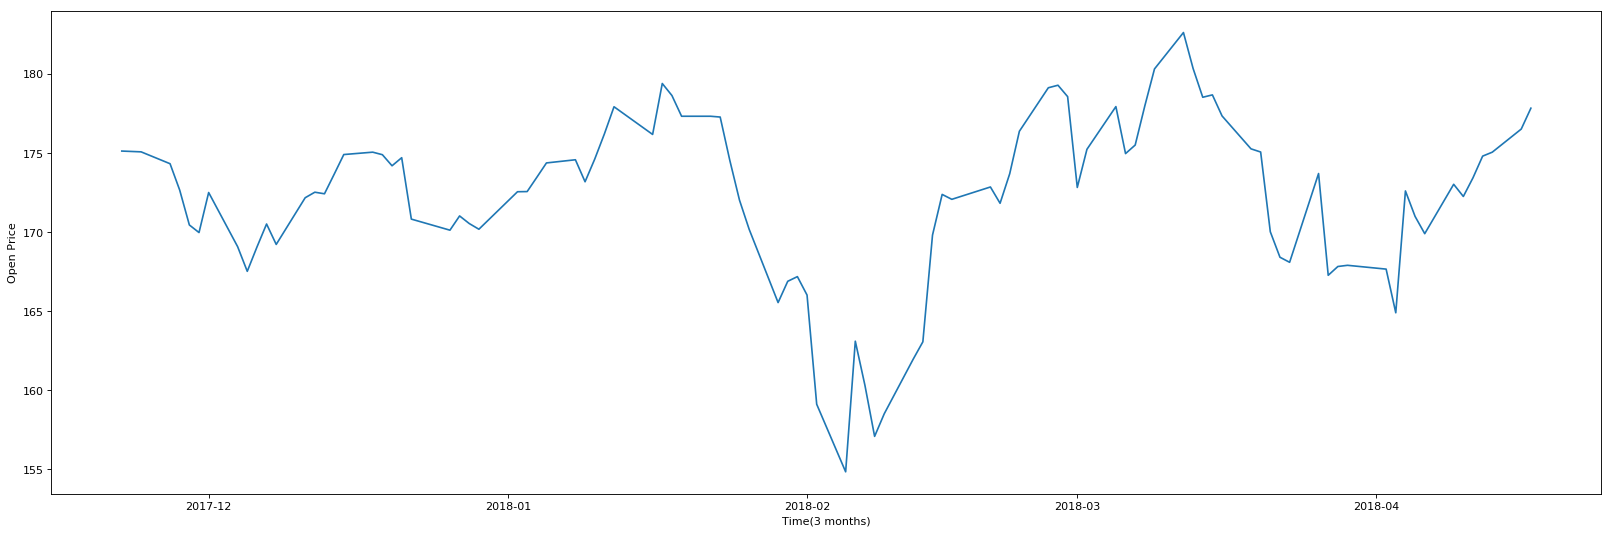

In [12]:
fig=plt.figure(figsize=(25,8),dpi=80,facecolor ='w', edgecolor='k')
ax=fig.add_subplot(111)
ax.plot(df.open[1:100])
ax.set_xlabel('Time(3 months)')
ax.set_ylabel('Open Price')
#plt.savefig("Open Price for 3 Months")

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:
1. constant mean
2. constant variance
3. an autocovariance that does not depend on time.

In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\lalwa\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# How to make a Time Series Stationary?
There are 2 major reasons behind non-stationaruty of a TS:
1. Trend – varying mean over time. For eg, in this case we saw that on average, the open price was growing over time.
2. Seasonality – variations at specific time-frames.

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

C:\Users\lalwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\lalwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


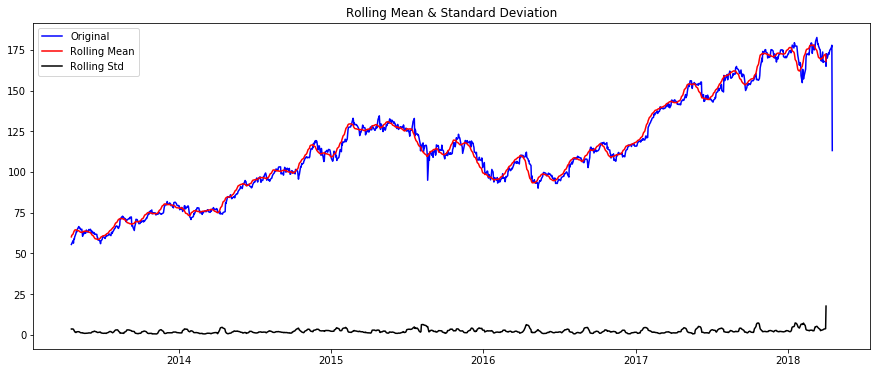

Results of Dickey-Fuller Test:
Test Statistic                   -1.020154
p-value                           0.745843
#Lags Used                        1.000000
Number of Observations Used    1258.000000
Critical Value (1%)              -3.435559
Critical Value (5%)              -2.863840
Critical Value (10%)             -2.567995
dtype: float64


In [16]:
test_stationarity(ts)


So, more formally, we can check stationarity using the following:

1. Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
2. Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 

# Estimating & Eliminating Trend
One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

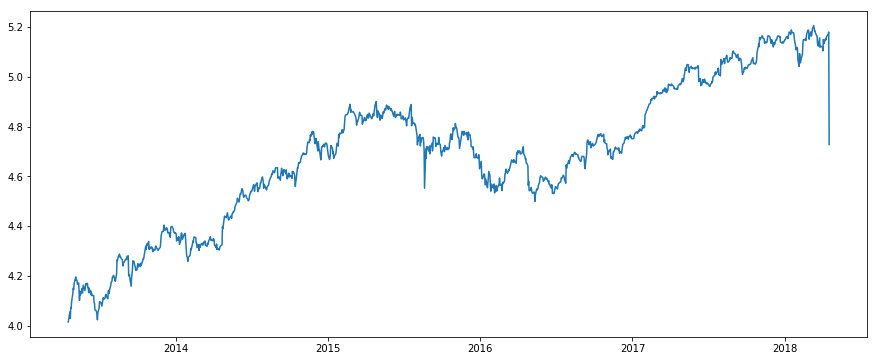

In [17]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [18]:
ts_log.index

DatetimeIndex(['2018-04-18', '2018-04-17', '2018-04-16', '2018-04-13',
               '2018-04-12', '2018-04-11', '2018-04-10', '2018-04-09',
               '2018-04-06', '2018-04-05',
               ...
               '2013-05-01', '2013-04-30', '2013-04-29', '2013-04-26',
               '2013-04-25', '2013-04-24', '2013-04-23', '2013-04-22',
               '2013-04-19', '2013-04-18'],
              dtype='datetime64[ns]', name='date', length=1260, freq=None)

It is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

1. Aggregation – taking average for a time period like monthly/weekly averages
2. Smoothing – taking rolling averages
3. Polynomial Fitting – fit a regression model

Smoothing refers to taking rolling estimates, i.e. considering the past few instances.

C:\Users\lalwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


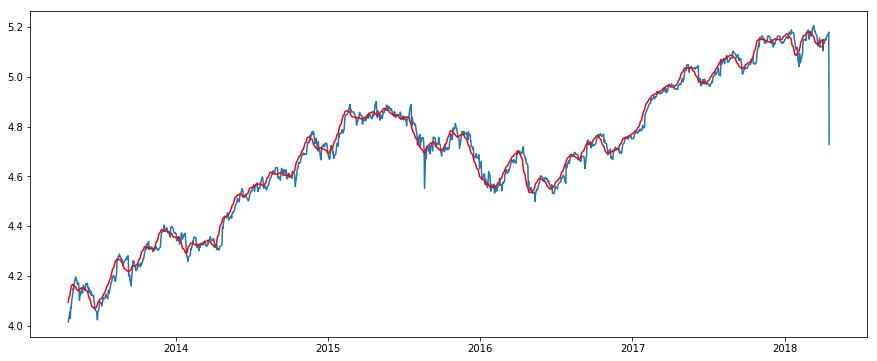

In [19]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

### Moving average
In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 12 days, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values.

In [20]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

date
2018-04-18         NaN
2018-04-17         NaN
2018-04-16         NaN
2018-04-13         NaN
2018-04-12         NaN
2018-04-11         NaN
2018-04-10         NaN
2018-04-09         NaN
2018-04-06         NaN
2018-04-05         NaN
2018-04-04         NaN
2018-04-03   -0.011561
Name: open, dtype: float64

In [21]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
2018-04-03   -0.011561
2018-04-02   -0.027742
2018-03-29   -0.021522
2018-03-28   -0.017764
2018-03-27   -0.017288
Name: open, dtype: float64

C:\Users\lalwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\lalwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


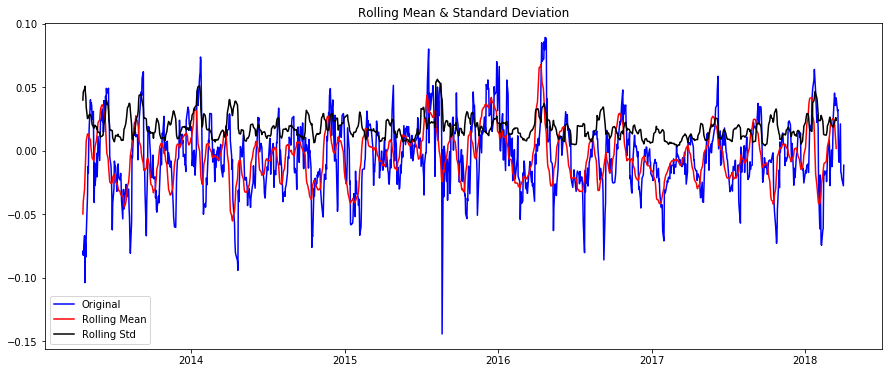

Results of Dickey-Fuller Test:
Test Statistic                -7.769036e+00
p-value                        9.024223e-12
#Lags Used                     1.300000e+01
Number of Observations Used    1.235000e+03
Critical Value (1%)           -3.435656e+00
Critical Value (5%)           -2.863883e+00
Critical Value (10%)          -2.568018e+00
dtype: float64


In [22]:
test_stationarity(ts_log_moving_avg_diff)

### This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

##### There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor.

C:\Users\lalwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


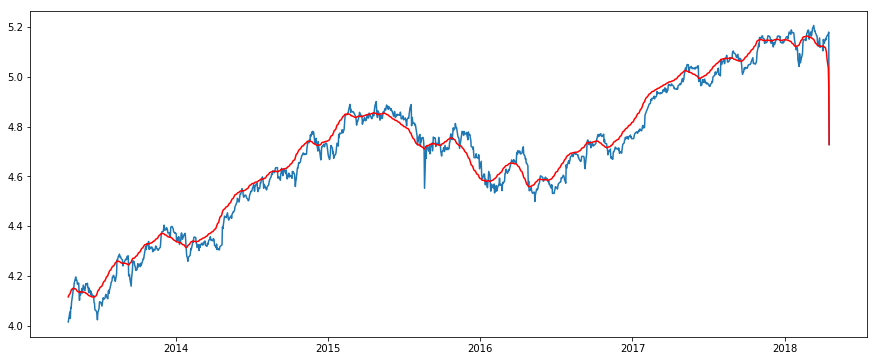

In [23]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

C:\Users\lalwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\lalwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


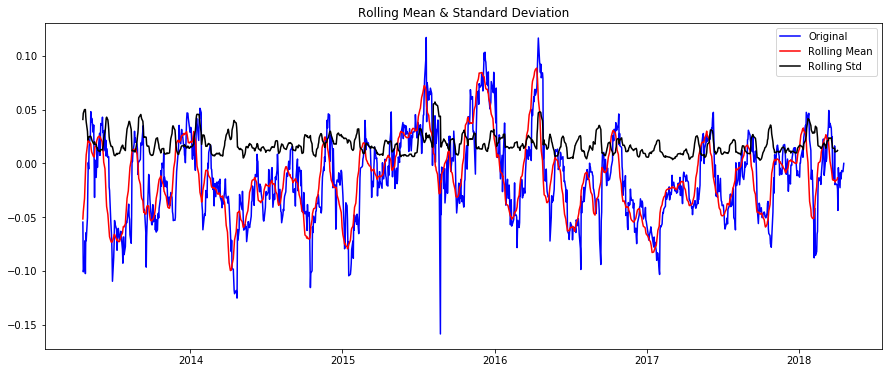

Results of Dickey-Fuller Test:
Test Statistic                -6.183827e+00
p-value                        6.359958e-08
#Lags Used                     1.000000e+00
Number of Observations Used    1.258000e+03
Critical Value (1%)           -3.435559e+00
Critical Value (5%)           -2.863840e+00
Critical Value (10%)          -2.567995e+00
dtype: float64


In [104]:
ts_log_ewma_diff  = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

### This TS has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than the 1% critical value, which is better than the previous case. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

# Eliminating Trend and Seasonality
There two ways of removing trend and seasonality:

1. Differencing – taking the differece with a particular time lag
2. Decomposition – modeling both trend and seasonality and removing them from the model.


# Differencing
One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. First order differencing can be done in Pandas as:

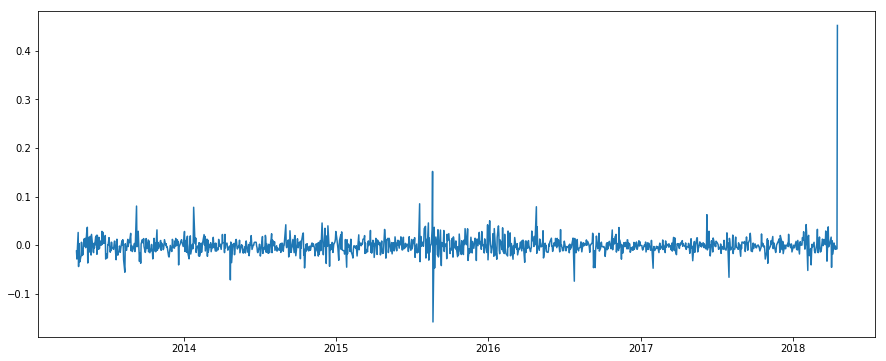

In [24]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\lalwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\lalwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


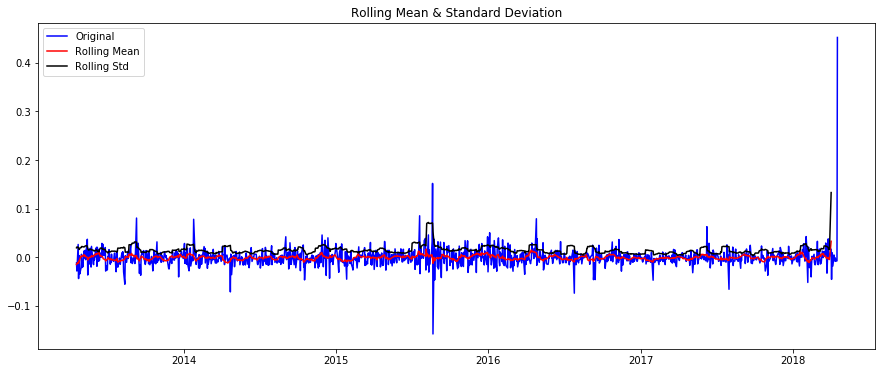

Results of Dickey-Fuller Test:
Test Statistic                  -49.494198
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1258.000000
Critical Value (1%)              -3.435559
Critical Value (5%)              -2.863840
Critical Value (10%)             -2.567995
dtype: float64


In [25]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Decomposing
In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned

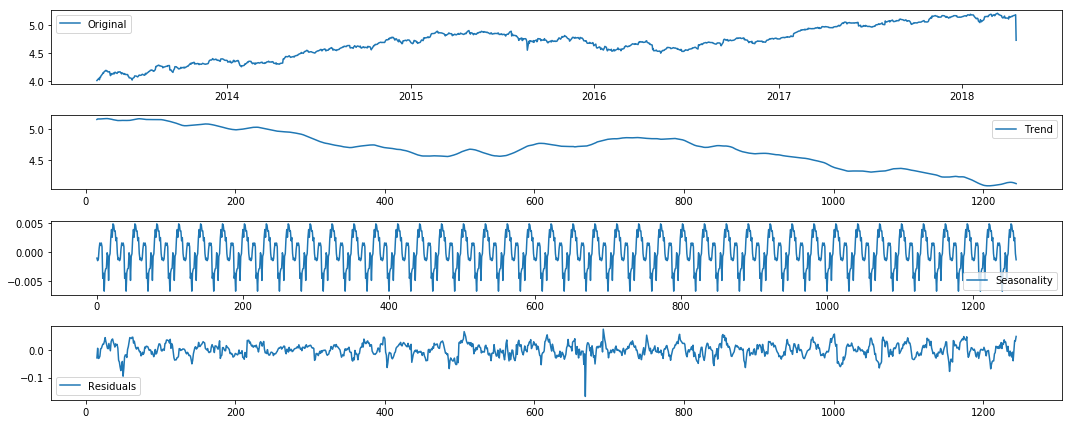

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log.values, freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\lalwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """
C:\Users\lalwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  


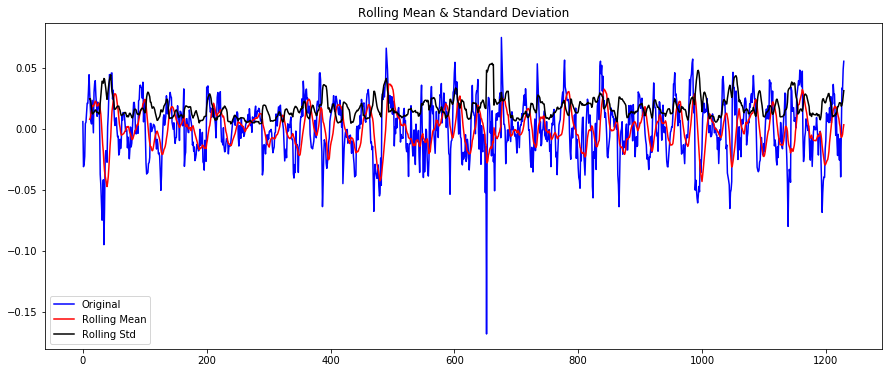

Results of Dickey-Fuller Test:
Test Statistic                -9.786197e+00
p-value                        6.533756e-17
#Lags Used                     1.800000e+01
Number of Observations Used    1.211000e+03
Critical Value (1%)           -3.435761e+00
Critical Value (5%)           -2.863930e+00
Critical Value (10%)          -2.568042e+00
dtype: float64


In [108]:
ts_log_decompose = residual
ts_log_decompose = ts_log_decompose[~np.isnan(ts_log_decompose)]
test_stationarity(ts_log_decompose)


### The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary.

# Forecasting a Time Series

We saw different techniques and all of them worked reasonably well for making the TS stationary. Lets make model on the TS after differencing as it is a very popular technique. Also, its relatively easier to add noise and seasonality back into predicted residuals in this case. Having performed the trend and seasonality estimation techniques, there can be two situations:

A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.
Let me give you a brief introduction to ARIMA. 

ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.
An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.
The ACF and PACF plots for the TS after differencing can be plotted as:

In [27]:
from statsmodels.tsa.arima_model import ARIMA

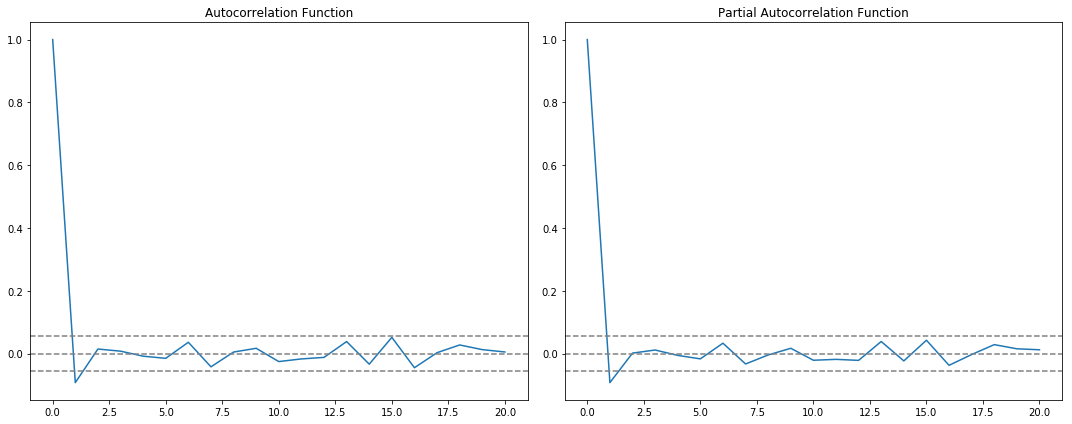

In [28]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

1. p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
2. q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

Now, lets make 3 different ARIMA models considering individual as well as combined effects. I will also print the RSS for each. Here RSS is for the values of residuals and not actual series.

We need to load the ARIMA model first:

# AR model:

C:\Users\lalwa\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\lalwa\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\lalwa\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 0.5374')

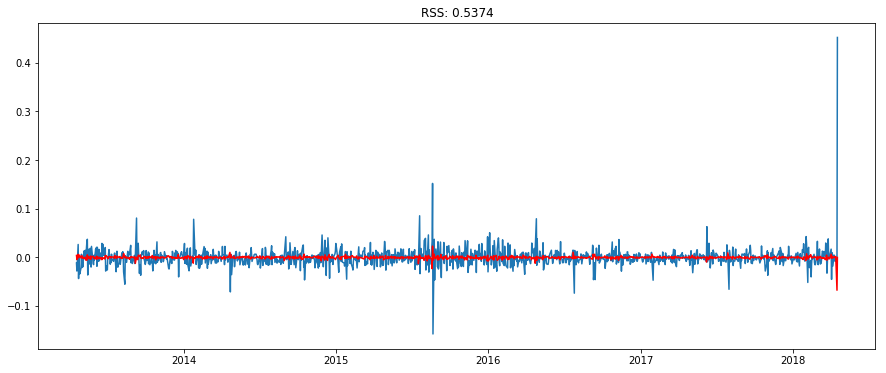

In [29]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

# MA Model

C:\Users\lalwa\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\lalwa\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\lalwa\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 0.5374')

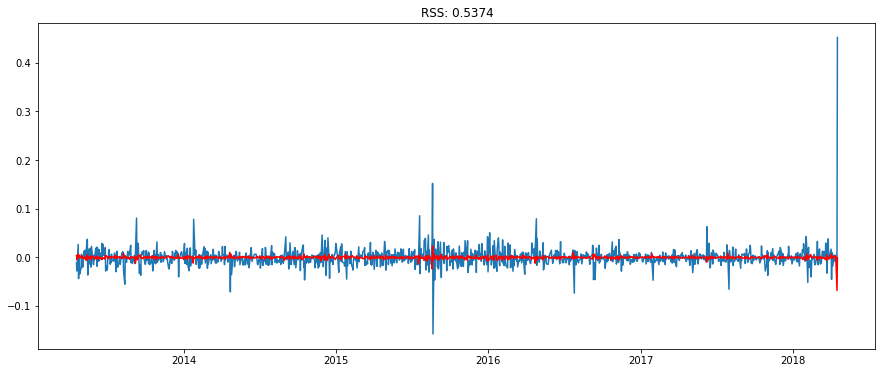

In [30]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

# Combined Model

C:\Users\lalwa\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\lalwa\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\lalwa\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\lalwa\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to 

Text(0.5,1,'RSS: 0.5365')

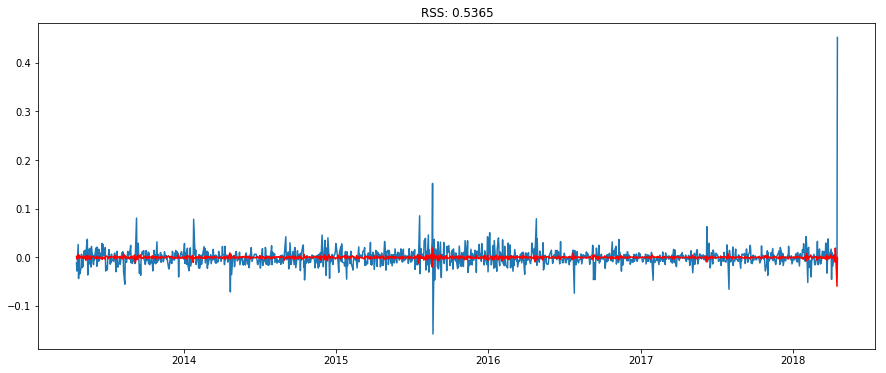

In [31]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Here we can see that the AR and MA models have almost the same RSS but combined is significantly better. Now, we are left with 1 last step, i.e. taking these values back to the original scale.

## Taking it back to original scale
Since the combined model gave best result, lets scale it back to the original values and see how well it performs there. First step would be to store the predicted results as a separate series and observe it.

In [32]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

date
2018-04-17   -0.000501
2018-04-16   -0.059803
2018-04-13    0.003925
2018-04-12    0.018821
2018-04-11   -0.009627
dtype: float64

In [33]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

date
2018-04-17   -0.000501
2018-04-16   -0.060304
2018-04-13   -0.056380
2018-04-12   -0.037558
2018-04-11   -0.047185
dtype: float64

In [35]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2013-04-18    4.101480
2013-04-19    4.099884
2013-04-22    4.103813
2013-04-23    4.098711
2013-04-24    4.101049
dtype: float64

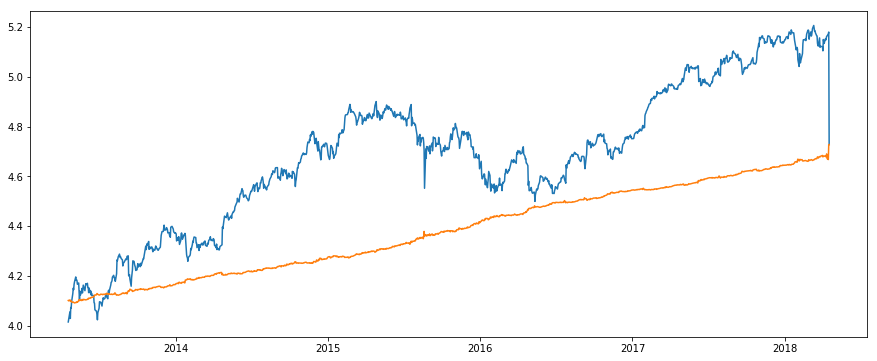

In [37]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

Text(0.5,1,'RMSE: 37.9553')

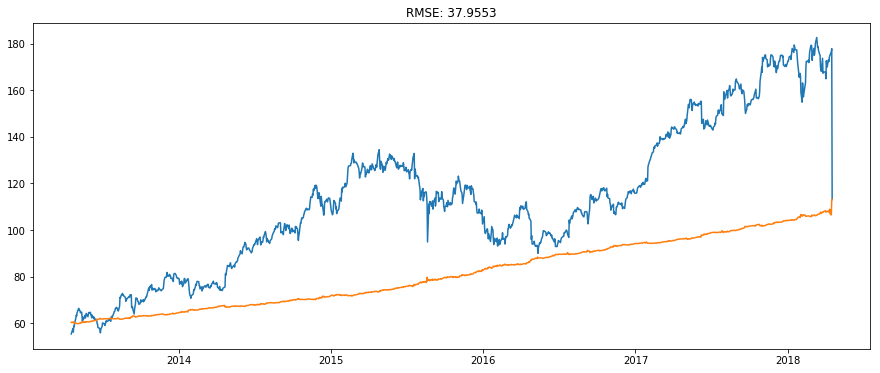

In [38]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

# Finally we have a forecast at the original scale.



In [56]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [59]:
R2_Score = r2_score(ts, predictions_ARIMA)
MAE = mean_absolute_error(ts, predictions_ARIMA)
MAPE = np.mean(np.abs((ts - predictions_ARIMA) / ts)) * 100
RMSE = np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts))

In [64]:
print('Mean absolute error is : %.4f'%MAE)
print('Mean absolute percentage error is : %.4f'%MAPE)
print('Root mean squared error is : %.4f'%RMSE)
print('RSquare is : %.4f'%R2_Score)

Mean absolute error is : 44.9231
Mean absolute percentage error is : 25.4971
Root mean squared error is : 37.9553
RSquare is : -1.9989


# Conclusion: 
#### Here we see that R2 is negative i.e the model is not good with having a feature previous day open price.